In [15]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split

diab = load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [16]:
X, y = diab.data, diab.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)
print(X_train.shape)
print(X_test.shape)

(331, 10)
(111, 10)


In [17]:
from sklearn.svm import SVR
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print(kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train, y_train)))
    print(kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test, y_test)))

linear 核函数的模型训练集得分：-0.006
linear 核函数的模型测试集得分：-0.068
rbf 核函数的模型训练集得分：0.168
rbf 核函数的模型测试集得分：0.093


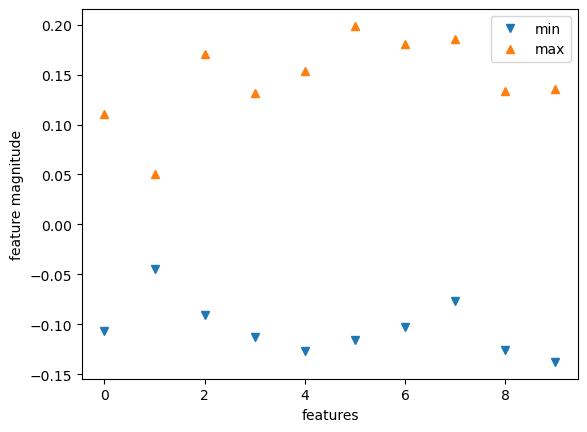

In [18]:
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
#plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('features')
plt.ylabel('feature magnitude')
plt.show()

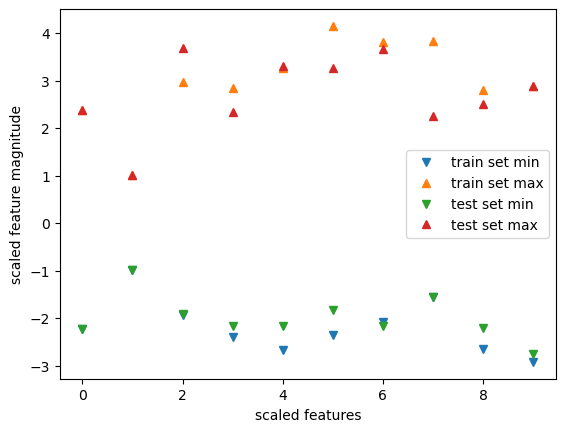

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.plot(X_train_scaled.min(axis=0),'v',label='train set min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train set max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test set min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test set max')
#plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('scaled features')
plt.ylabel('scaled feature magnitude')
plt.show()

In [20]:
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print('数据预处理后',kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
    print('数据预处理后',kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

数据预处理后 linear 核函数的模型训练集得分：0.511
数据预处理后 linear 核函数的模型测试集得分：0.418
数据预处理后 rbf 核函数的模型训练集得分：0.169
数据预处理后 rbf 核函数的模型测试集得分：0.093


In [28]:
svr = SVR(C=200, gamma=0.05)
svr.fit(X_train_scaled, y_train)
print('调节参数后的模型在训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
print('调节参数后的模型在测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

调节参数后的模型在训练集得分：0.661
调节参数后的模型在测试集得分：0.359
